In this notebook, we cover:

* [Tidy data](#Tidy-data)
* [Gather](#Gather)
* [Spread](#Spread)

# Tidy data

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
print(table1) # every column is a variable

# A tibble: 6 × 4
      country  year  cases population
        <chr> <int>  <int>      <int>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3      Brazil  1999  37737  172006362
4      Brazil  2000  80488  174504898
5       China  1999 212258 1272915272
6       China  2000 213766 1280428583


In [3]:
print(table2) # variables are entries in the type column

# A tibble: 12 × 4
       country  year       type      count
         <chr> <int>      <chr>      <int>
1  Afghanistan  1999      cases        745
2  Afghanistan  1999 population   19987071
3  Afghanistan  2000      cases       2666
4  Afghanistan  2000 population   20595360
5       Brazil  1999      cases      37737
6       Brazil  1999 population  172006362
7       Brazil  2000      cases      80488
8       Brazil  2000 population  174504898
9        China  1999      cases     212258
10       China  1999 population 1272915272
11       China  2000      cases     213766
12       China  2000 population 1280428583


In [4]:
print(table3) # the cases and population variables are mixed up in the rate column

# A tibble: 6 × 3
      country  year              rate
*       <chr> <int>             <chr>
1 Afghanistan  1999      745/19987071
2 Afghanistan  2000     2666/20595360
3      Brazil  1999   37737/172006362
4      Brazil  2000   80488/174504898
5       China  1999 212258/1272915272
6       China  2000 213766/1280428583


In [5]:
print(table4a) # cases in one tibble
writeLines("\n\n")
print(table4b) # population in another one

# A tibble: 3 × 3
      country `1999` `2000`
*       <chr>  <int>  <int>
1 Afghanistan    745   2666
2      Brazil  37737  80488
3       China 212258 213766



# A tibble: 3 × 3
      country     `1999`     `2000`
*       <chr>      <int>      <int>
1 Afghanistan   19987071   20595360
2      Brazil  172006362  174504898
3       China 1272915272 1280428583


Tidy data means:

* each observation has its own row
* each variable has its own column
* each value has its own cell

Benefits of tidy data include the ability to use `dplyr` functions like `mutate`, `count` and create visualizations using `ggplot`.

In [6]:
mutate(table1, rate = cases / population * 10000) # rate of cases per 10000 people

country,year,cases,population,rate
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [7]:
count(table1, year, wt = cases) # compute no. of cases for each year

year,n
1999,250740
2000,296920


In [8]:
options(repr.plot.width=6, repr.plot.height=4)

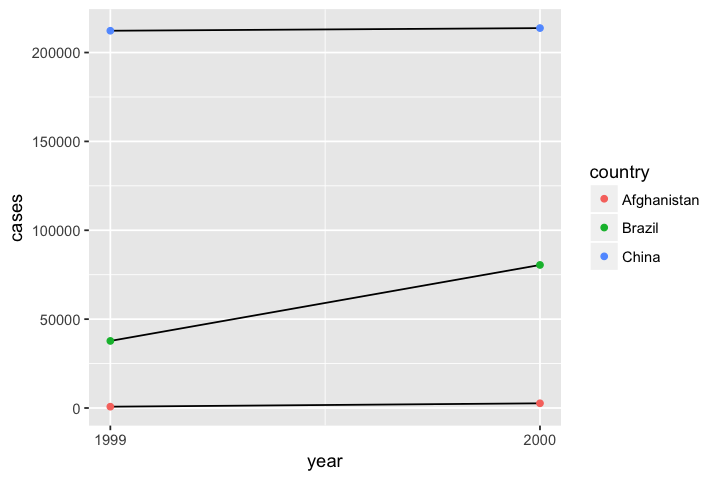

In [9]:
ggplot(table1, aes(year, cases)) +
    geom_line(aes(group = country)) +
    geom_point(aes(color = country)) +
    scale_x_continuous(breaks=c(1999, 2000))

If the data is not already tidy, then we might need to some work before we can use the tools in `dplyr`. The package `tidyr` inside `tidyverse` allows one to convert data into the tidy data.

# Gather

One type of problem in when a variable is spread across multiple columns and we need to gather those columns to create a new pair of variables.

We need to specify three things:

* which existing columns correspond to values of a variable
* what is the name of the variable (the **key**) whose values currently appear as column names
* what is the name of the variable (the **value**) whose values are currently spread over the cells 

In [10]:
print(table4a)

# A tibble: 3 × 3
      country `1999` `2000`
*       <chr>  <int>  <int>
1 Afghanistan    745   2666
2      Brazil  37737  80488
3       China 212258 213766


Above, the **key** is the variable **year** and the **value** is the variable **cases**.

In [11]:
(tidy4a <-
    table4a %>%
        gather(`1999`, `2000`, key = "year", value = "cases")
 )

country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


A similar `gather` command will work to create the **year** and **population** variables from `table4b`. 

In [12]:
(tidy4b <-
    table4b %>%
        gather(`1999`, `2000`, key = "year", value = "population")
)

country,year,population
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


In [13]:
left_join(tidy4a, tidy4b) # we will learn about left_join() later

Joining, by = c("country", "year")


country,year,cases,population
Afghanistan,1999,745,19987071
Brazil,1999,37737,172006362
China,1999,212258,1272915272
Afghanistan,2000,2666,20595360
Brazil,2000,80488,174504898
China,2000,213766,1280428583


# Spread

Another type of problem in when an observation is scattered across multiple rows.

We need to specify two things:

* which existing column (the **key**) has the variable names as values
* which existing column (the **value**) has the values for those variables

In [14]:
print(table2)

# A tibble: 12 × 4
       country  year       type      count
         <chr> <int>      <chr>      <int>
1  Afghanistan  1999      cases        745
2  Afghanistan  1999 population   19987071
3  Afghanistan  2000      cases       2666
4  Afghanistan  2000 population   20595360
5       Brazil  1999      cases      37737
6       Brazil  1999 population  172006362
7       Brazil  2000      cases      80488
8       Brazil  2000 population  174504898
9        China  1999      cases     212258
10       China  1999 population 1272915272
11       China  2000      cases     213766
12       China  2000 population 1280428583


In [15]:
spread(table2, key = type, value = count)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


Remember that:

* `gather` tends to make wide tables narrower and longer
* `spread` tends to make long tables shorter and wider